<a href="https://colab.research.google.com/github/SMSinclair/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Stephen_Sinclair_LS_DS4_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [19]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [20]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [27]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [28]:
income.head()

geo  time  income_per_person_gdppercapita_ppp_inflation_adjusted
0  afg  1800                                                603    
1  afg  1801                                                603    
2  afg  1802                                                603    
3  afg  1803                                                603    
4  afg  1804                                                603

In [29]:
lifespan.head()

geo  time  life_expectancy_years
0  abw  1800                  34.42
1  abw  1801                  34.42
2  abw  1802                  34.42
3  abw  1803                  34.42
4  abw  1804                  34.42

In [30]:
population.head()

geo  time  population_total
0  afg  1800           3280000
1  afg  1801           3280000
2  afg  1802           3280000
3  afg  1803           3280000
4  afg  1804           3280000

In [31]:
pd.options.display.max_columns = 500
entities.head()

country alt_5                    alternative_1 alternative_2 alternative_3  \
0    abkh   NaN                              NaN           NaN           NaN   
1     abw   NaN                              NaN           NaN           NaN   
2     afg   NaN  Islamic Republic of Afghanistan           NaN           NaN   
3     ago   NaN                              NaN           NaN           NaN   
4     aia   NaN                              NaN           NaN           NaN   

  alternative_4_cdiac arb1 arb2 arb3 arb4 arb5 arb6 g77_and_oecd_countries  \
0                 NaN  NaN  NaN  NaN  NaN  NaN  NaN                 others   
1               Aruba  NaN  NaN  NaN  NaN  NaN  NaN                 others   
2         Afghanistan  NaN  NaN  NaN  NaN  NaN  NaN                    g77   
3              Angola  NaN  NaN  NaN  NaN  NaN  NaN                    g77   
4                 NaN  NaN  NaN  NaN  NaN  NaN  NaN                 others   

  gapminder_list god_id gwid        income_groups  is--country  \
0       Abkhazia  GE-AB   i0                  NaN         True   
1          Aruba     AW  i12          high_income         True   
2    Afghanistan     AF   i1           low_income         True   
3         Angola     AO   i7  upper_middle_income         True   
4       Anguilla     AI   i8                  NaN         True   

  iso3166_1_alpha2 iso3166_1_alpha3  iso3166_1_numeric iso3166_2  landlocked  \
0              NaN              NaN                NaN       NaN         NaN   
1               AW              ABW              533.0       NaN   coastline   
2               AF              AFG                4.0       NaN  landlocked   
3               AO              AGO               24.0       NaN   coastline   
4               AI              AIA              660.0       NaN   coastline   

   latitude  longitude main_religion_2008         name        pandg  un_state  \
0       NaN        NaN                NaN     Abkhazia          NaN     False   
1  12.50000  -69.96667          christian        Aruba          NaN     False   
2  33.00000   66.00000             muslim  Afghanistan  AFGHANISTAN      True   
3 -12.50000   18.50000          christian       Angola       ANGOLA      True   
4  18.21667  -63.05000          christian     Anguilla          NaN     False   

  unicode_region_subtag upper_case_name world_4region        world_6region  
0                   NaN             NaN        europe  europe_central_asia  
1                    AW           ARUBA      americas              america  
2                    AF     AFGHANISTAN          asia           south_asia  
3                    AO          ANGOLA        africa   sub_saharan_africa  
4                    AI        ANGUILLA      americas              america

In [32]:
concepts.head()

concept color concept_type  \
0                  adults_with_hiv_percent_age_15_49   NaN      measure   
1                          age_at_1st_marriage_women   NaN      measure   
2                 aged_15_24_employment_rate_percent   NaN      measure   
3               aged_15_24_unemployment_rate_percent   NaN      measure   
4  aged_15_64_labour_force_participation_rate_per...   NaN      measure   

                                         description description_long domain  \
0  The estimated percentage of adults aged 15 to ...              NaN    NaN   
1  The mean age, in years, of first marriage for ...              NaN    NaN   
2  Percentage of total population, age group 15-2...              NaN    NaN   
3  Percentage of total population, age group 15-2...              NaN    NaN   
4  For age group 15-64, percentage of all labour ...              NaN    NaN   

  drill_up indicator_url                                            name  \
0      NaN           NaN                  Adults with HIV (%, age 15-49)   
1      NaN           NaN                     Age at 1st marriage (women)   
2      NaN           NaN                  Aged 15-24 employment rate (%)   
3      NaN           NaN                Aged 15-24 unemployment rate (%)   
4      NaN           NaN  Aged 15-64 labour force participation rate (%)   

                     name_catalog                           name_short  \
0  Adults with HIV (%, age 15-49)                      Adults with HIV   
1     Age at 1st marriage (women)                  Age at 1st marriage   
2                      Aged 15-24                  Employment rate (%)   
3                      Aged 15-24                Unemployment rate (%)   
4                      Aged 15-64  Labour force participation rate (%)   

              scales source source_long  \
0  ["log", "linear"]    NaN         NaN   
1  ["linear", "log"]    NaN         NaN   
2  ["linear", "log"]    NaN         NaN   
3  ["linear", "log"]    NaN         NaN   
4  ["linear", "log"]    NaN         NaN   

                                          source_url  \
0  https://www.gapminder.org/gapminder-world/docu...   
1  https://www.gapminder.org/data/documentation/g...   
2                       https://www.ilo.org/ilostat/   
3                       https://www.ilo.org/ilostat/   
4                       https://www.ilo.org/ilostat/   

                         tags  
0                         hiv  
1                  population  
2             employment_rate  
3                unemployment  
4  labour_force_participation

## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [33]:
# df = pd.merge(income, lifespan)
# df = pd.merge(df, pop)
df = income.merge(lifespan).merge(population)
df.shape

# Do you need to specify the columns to join on?

(40437, 5)

In [35]:
df.head()

geo  time  income_per_person_gdppercapita_ppp_inflation_adjusted  \
0  afg  1800                                                603       
1  afg  1801                                                603       
2  afg  1802                                                603       
3  afg  1803                                                603       
4  afg  1804                                                603       

   life_expectancy_years  population_total  
0                  28.21           3280000  
1                  28.20           3280000  
2                  28.19           3280000  
3                  28.18           3280000  
4                  28.17           3280000

In [36]:
# We still need - regions and nice country name
entities.head()

country alt_5                    alternative_1 alternative_2 alternative_3  \
0    abkh   NaN                              NaN           NaN           NaN   
1     abw   NaN                              NaN           NaN           NaN   
2     afg   NaN  Islamic Republic of Afghanistan           NaN           NaN   
3     ago   NaN                              NaN           NaN           NaN   
4     aia   NaN                              NaN           NaN           NaN   

  alternative_4_cdiac arb1 arb2 arb3 arb4 arb5 arb6 g77_and_oecd_countries  \
0                 NaN  NaN  NaN  NaN  NaN  NaN  NaN                 others   
1               Aruba  NaN  NaN  NaN  NaN  NaN  NaN                 others   
2         Afghanistan  NaN  NaN  NaN  NaN  NaN  NaN                    g77   
3              Angola  NaN  NaN  NaN  NaN  NaN  NaN                    g77   
4                 NaN  NaN  NaN  NaN  NaN  NaN  NaN                 others   

  gapminder_list god_id gwid        income_groups  is--country  \
0       Abkhazia  GE-AB   i0                  NaN         True   
1          Aruba     AW  i12          high_income         True   
2    Afghanistan     AF   i1           low_income         True   
3         Angola     AO   i7  upper_middle_income         True   
4       Anguilla     AI   i8                  NaN         True   

  iso3166_1_alpha2 iso3166_1_alpha3  iso3166_1_numeric iso3166_2  landlocked  \
0              NaN              NaN                NaN       NaN         NaN   
1               AW              ABW              533.0       NaN   coastline   
2               AF              AFG                4.0       NaN  landlocked   
3               AO              AGO               24.0       NaN   coastline   
4               AI              AIA              660.0       NaN   coastline   

   latitude  longitude main_religion_2008         name        pandg  un_state  \
0       NaN        NaN                NaN     Abkhazia          NaN     False   
1  12.50000  -69.96667          christian        Aruba          NaN     False   
2  33.00000   66.00000             muslim  Afghanistan  AFGHANISTAN      True   
3 -12.50000   18.50000          christian       Angola       ANGOLA      True   
4  18.21667  -63.05000          christian     Anguilla          NaN     False   

  unicode_region_subtag upper_case_name world_4region        world_6region  
0                   NaN             NaN        europe  europe_central_asia  
1                    AW           ARUBA      americas              america  
2                    AF     AFGHANISTAN          asia           south_asia  
3                    AO          ANGOLA        africa   sub_saharan_africa  
4                    AI        ANGUILLA      americas              america

In [37]:
entities[['country','name','world_6region']].head()

country         name        world_6region
0    abkh     Abkhazia  europe_central_asia
1     abw        Aruba              america
2     afg  Afghanistan           south_asia
3     ago       Angola   sub_saharan_africa
4     aia     Anguilla              america

In [38]:
df = pd.merge(df, entities[['country','name','world_6region']], 
              left_on='geo', right_on='country')
df.shape

(40437, 8)

In [39]:
df.head()

geo  time  income_per_person_gdppercapita_ppp_inflation_adjusted  \
0  afg  1800                                                603       
1  afg  1801                                                603       
2  afg  1802                                                603       
3  afg  1803                                                603       
4  afg  1804                                                603       

   life_expectancy_years  population_total country         name world_6region  
0                  28.21           3280000     afg  Afghanistan    south_asia  
1                  28.20           3280000     afg  Afghanistan    south_asia  
2                  28.19           3280000     afg  Afghanistan    south_asia  
3                  28.18           3280000     afg  Afghanistan    south_asia  
4                  28.17           3280000     afg  Afghanistan    south_asia

In [40]:
df = df.drop(columns=['geo','country'])
df.head()

time  income_per_person_gdppercapita_ppp_inflation_adjusted  \
0  1800                                                603       
1  1801                                                603       
2  1802                                                603       
3  1803                                                603       
4  1804                                                603       

   life_expectancy_years  population_total         name world_6region  
0                  28.21           3280000  Afghanistan    south_asia  
1                  28.20           3280000  Afghanistan    south_asia  
2                  28.19           3280000  Afghanistan    south_asia  
3                  28.18           3280000  Afghanistan    south_asia  
4                  28.17           3280000  Afghanistan    south_asia

In [41]:
df = df.rename(columns={
    'time':'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted':'income',
    'life_expectancy_years':'lifespan',
    'population_total':'population',
    'name':'country',
    'world_6region':'region'
                       })
df.tail()

year  income  lifespan  population   country              region
40432  2014    1908     56.99    15411675  Zimbabwe  sub_saharan_africa
40433  2015    1891     58.27    15777451  Zimbabwe  sub_saharan_africa
40434  2016    1860     59.27    16150362  Zimbabwe  sub_saharan_africa
40435  2017    1907     59.80    16529904  Zimbabwe  sub_saharan_africa
40436  2018    1952     60.18    16913261  Zimbabwe  sub_saharan_africa

## Explore data

In [42]:
df.describe()

year         income      lifespan    population
count  40437.000000   40437.000000  40437.000000  4.043700e+04
mean    1909.292900    4619.492717     43.132080  1.371204e+07
std       63.308682   10209.571045     16.313228  6.606335e+07
min     1800.000000     247.000000      1.000000  2.128000e+03
25%     1854.000000     876.000000     31.160000  4.113310e+05
50%     1909.000000    1442.000000     35.500000  1.985952e+06
75%     1964.000000    3488.000000     55.970000  6.499707e+06
max     2018.000000  177522.000000     84.170000  1.415046e+09

In [43]:
df.skew()

year          -0.005098
income         6.300582
lifespan       0.825236
population    13.031487
dtype: float64

In [44]:
df[df['year'] == 2018].skew()

year          0.000000
income        2.056521
lifespan     -0.506461
population    8.224550
dtype: float64

In [45]:
df[df['year'] == 1800].skew()

year           0.000000
income         2.709177
lifespan       0.090251
population    10.199690
dtype: float64

In [46]:
df[df['year'] == 1918].skew()

year          0.000000
income        2.161759
lifespan      0.815414
population    9.000622
dtype: float64

In [47]:
# USA at 1818, 1918, 2018

usa = df[df['country'] == 'United States']
usa[usa['year'].isin([1818,1918,2018])]

year  income  lifespan  population        country   region
38046  1818    2258     39.41     9879049  United States  america
38146  1918    9371     47.18   106721812  United States  america
38246  2018   54898     79.14   326766748  United States  america

In [48]:
china = df[df['country'] == 'China']
china[china['year'].isin([1818,1918,2018])]

year  income  lifespan  population country             region
6854  1818     985     32.00   374161494   China  east_asia_pacific
6954  1918     989     22.13   462444535   China  east_asia_pacific
7054  2018   16018     76.92  1415045928   China  east_asia_pacific

## Plot visualization

In [66]:
now = df[df['year'] == 2018]
now.shape

(184, 6)

In [67]:
now.head()

year  income  lifespan  population               country  \
218   2018    1867     58.69    36373176           Afghanistan   
437   2018    5846     65.19    30774205                Angola   
656   2018   12424     78.01     2934363               Albania   
922   2018   68231     76.89     9541615  United Arab Emirates   
1141  2018   18942     76.97    44688864             Argentina   

                        region  
218                 south_asia  
437         sub_saharan_africa  
656        europe_central_asia  
922   middle_east_north_africa  
1141                   america

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2f2898eb8>,
      dtype=object)

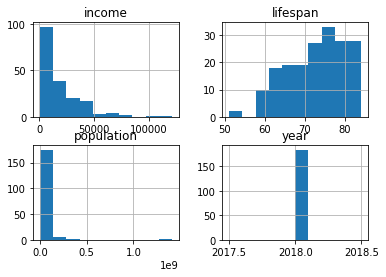

In [68]:
now.hist()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2018.0, right=2018.0
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6

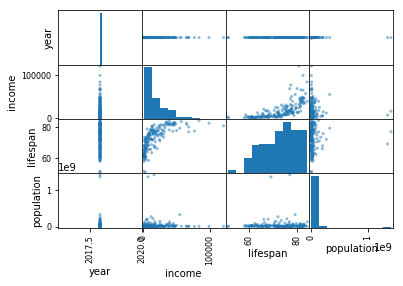

In [69]:
pd.plotting.scatter_matrix(now);

In [0]:
#help(sns.relplot)

In [71]:
now['population'].describe()

count    1.840000e+02
mean     4.126209e+07
std      1.487751e+08
min      9.523500e+04
25%      2.831068e+06
50%      9.496864e+06
75%      3.059006e+07
max      1.415046e+09
Name: population, dtype: float64

In [0]:
# Failed attempt to create a dictionary to pass to the size parameter for 
# .relplot(). The session crashes after using all available RAM.

# sdict= {range(0,2831068):1, range(2831068,9496864):2, 
#  range(9496864,30590060):3, range(30590060,1415046000):4}

In [57]:
# Maybe it would be more tractable if we normalized the population feature?
now.dtypes


year            int64
income          int64
lifespan      float64
population      int64
country        object
region         object
dtype: object

In [76]:
# Making a column of normalized population values

from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = now['population'].values.astype(float).reshape(-1, 1)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

now['pop_norm'] = x_scaled
now.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


year  income  lifespan  population               country  \
218   2018    1867     58.69    36373176           Afghanistan   
437   2018    5846     65.19    30774205                Angola   
656   2018   12424     78.01     2934363               Albania   
922   2018   68231     76.89     9541615  United Arab Emirates   
1141  2018   18942     76.97    44688864             Argentina   

                        region  pop_norm  
218                 south_asia  0.025639  
437         sub_saharan_africa  0.021682  
656        europe_central_asia  0.002007  
922   middle_east_north_africa  0.006676  
1141                   america  0.031516

In [78]:
now['pop_norm'].describe()

count    184.000000
mean       0.029094
std        0.105145
min        0.000000
25%        0.001934
50%        0.006644
75%        0.021552
max        1.000000
Name: pop_norm, dtype: float64

In [79]:
# sdict={range(0,0.001934):2, range(0.001934,0.006644):4, 
#        range(0.006644,0.021552):6, range(0.021552,1):8}

# This is taking too long, moving on

TypeError: ignored

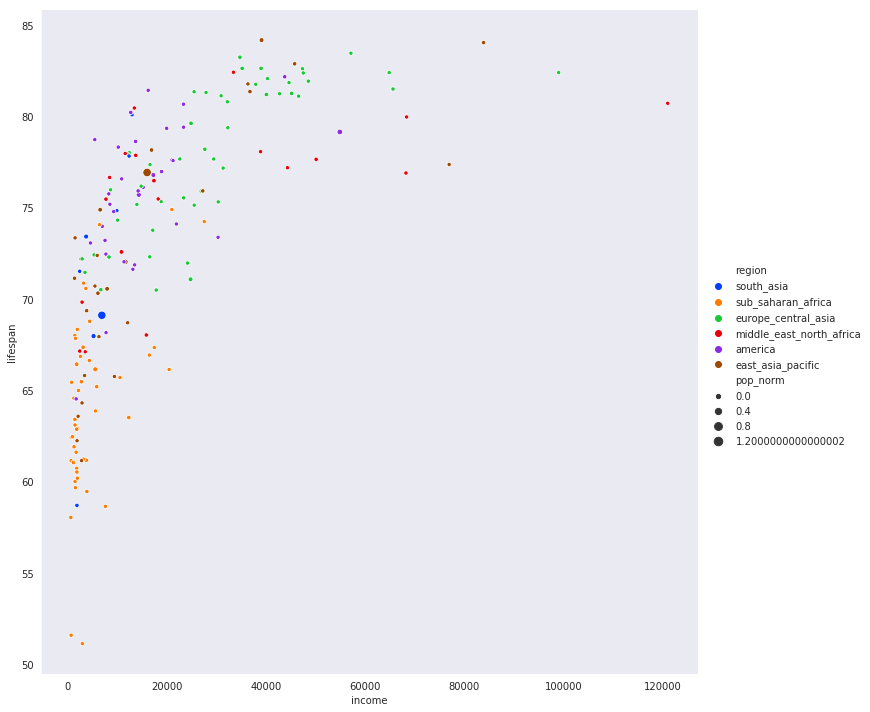

In [77]:

sns.set_style('dark')
sns.relplot(x='income', y='lifespan', hue='region', size='pop_norm', 
            palette='bright', height=10, aspect=1, data=now);

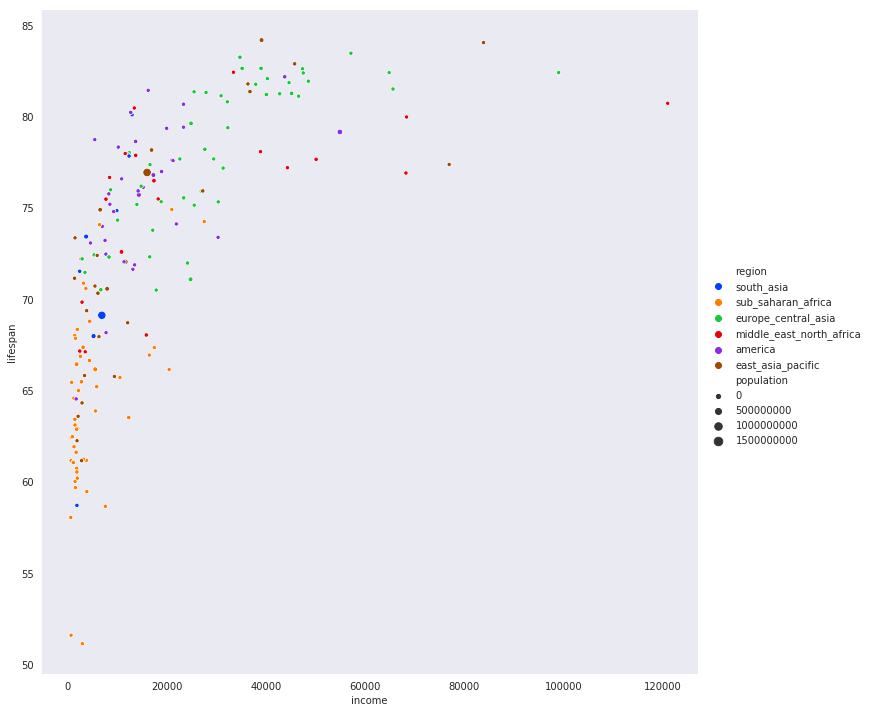

In [86]:
sns.set_style('dark')
sns.relplot(x='income', y='lifespan', hue='region', size='population',
            palette='bright', height=10, aspect=1, data=now);

In [0]:
now['log_income'] = np.log(now['income'])

In [0]:
sns.relplot(x='log_income', y='lifespan', hue='region', size='population',
           data=now);

In [0]:
# Stretch goals - continue to make it more like Gapminder

# Specific goals:
# Make bubble size more informative/varied
# Adding annotation for countries
# ***Generating many frames and/or animating (plotly?)

## Analyze outliers

In [0]:
now[now['income'] > 80000].sort_values(by='income')

In [0]:
qatar = now[now['country'] == 'Qatar']
qatar_income = qatar['income'].values[0]
qatar_lifespan = qatar['lifespan'].values[0]
print(qatar_income, qatar_lifespan)

In [0]:
sns.relplot(x='income', y='lifespan', hue='region', size='population',
           data=now);

plt.text(x = qatar_income, y = qatar_lifespan, s='Qatar')
plt.title('Qatar has the highest income in 2018')

## Plot multiple years

In [0]:
years = [1818,1918,2018]

centuries = df[df['year'].isin(years)]
centuries.describe()

In [0]:
sns.relplot(x='income', y='lifespan', hue='region', size='population',
            col='year', data=centuries)
plt.xscale('log');

## Point out a story

In [0]:
years=[1918,1938,1958,1978,1998,2018]

for year in years:
  sns.relplot(x='income', y='lifespan', hue='region', size='population',
            data=df[df['year']==year])
  plt.xscale('log')
  plt.xlim((150,150000))
  plt.ylim((20,90))
  plt.title(year)
  plt.axhline(y=50, color='grey')

In [85]:
size = (df['population']*14)**10
size.head(30)

0                       0
1                       0
2                       0
3                       0
4                       0
5                       0
6                       0
7                       0
8                       0
9                       0
10                      0
11    4114334266693592064
12   -5671046767616983040
13    1540071034563067904
14   -4261928726288138240
15   -3121960687789670400
16   -2564928047579922432
17    6279212672810483712
18    5421014870454697984
19    8358322685938672640
20   -3465772775473953792
21    5037525055798182912
22   -2877144722574409728
23   -7141583109102764032
24    5093189215933431808
25   -6940264349221551104
26   -4829364576653581312
27    4819173505848311808
28   -1557119571163348992
29    7502521482204938240
Name: population, dtype: int64

In [0]:
# def plot_save():
#   for plot in plots:
#     x = 1
#     filename = (f"{x}snsplot.png")
#     fig = plt.get_figure()
#     fig.savefig(filename)
#     x += 1

plt.tight_layout()
plt.style.use(['dark_background'])
years = list(range(1818, 2019,10))
size = (df['population']*14)**10
colors = sns.color_palette("CMRmap", n_colors=219, desat=.6)
  #  
  
for year in years:
  
  sns.relplot(x='income', y='lifespan',cmap=colors, hue='country', 
        size=size,
        data=df[df['year'] == year], legend=False)
  plt.grid(b=True, which='major', axis='both', color='grey', linestyle='-', linewidth=.5)
  plt.title(year, style='oblique')
  plt.axhline(y=50, color='grey');
  plt.xlim((400, 140000))
  plt.ylim((32, 90))
  #save plot per element
  plt.savefig(f"{year}.png")
# plt.xscale('log')

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project

In [83]:
# OK, lets try some animation.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# animate over some set of x, y
x = np.linspace(-4, 4, 100)
y = np.sin(x)
# First set up the figure, the axes, and the plot element
fig, ax = plt.subplots()

plt.close()
ax.set_xlim(( -4, 4))
ax.set_ylim((-2, 2))

line1, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line1.set_data(x, y)      
    return (line1,)

  # animation function: this is called sequentially
def animate(i):
  at_x = x[i]
  
  # gradient_line will have the form m*x + b
  m = np.cos(at_x)
  b = np.sin(at_x) - np.cos(at_x)*at_x
  gradient_line = m*x + b
  
  line2.set_data(x, gradient_line)
  return (line2,)
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=100, blit=True)
rc('animation', html='jshtml')
anim

In [94]:
df.head()

year  income  lifespan  population      country      region
0  1800     603     28.21     3280000  Afghanistan  south_asia
1  1801     603     28.20     3280000  Afghanistan  south_asia
2  1802     603     28.19     3280000  Afghanistan  south_asia
3  1803     603     28.18     3280000  Afghanistan  south_asia
4  1804     603     28.17     3280000  Afghanistan  south_asia

In [110]:
df['log_income'] = np.log(df['income'])
df['log_income'].describe()

count    40437.000000
mean         7.583173
std          1.119147
min          5.509388
25%          6.775366
50%          7.273786
75%          8.157084
max         12.086850
Name: log_income, dtype: float64

In [114]:
import matplotlib
import matplotlib.animation as animation

Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure(figsize=(10,6))
plt.ylim(0,90)
plt.xlim(6,9)
plt.xlabel('log_income',fontsize=20)
plt.ylabel('lifespan',fontsize=20)
plt.title('Lifespan by income',fontsize=20)


def animate(i):
    p = sns.scatterplot(x='log_income', y='lifespan', hue='region', 
                        size='population',data=df[df['year']==(i+1917)], 
                        palette='bright')
    p.tick_params(labelsize=40)
    plt.setp(p.lines,linewidth=7)
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=5, repeat=True)
ani
#ani.save('lifetimelog2.mp4', writer=writer)

<IPython.core.display.Javascript object>

In [117]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure(figsize=(10,6))
plt.ylim(0,90)
plt.xscale('log')
plt.xlabel('log_income',fontsize=20)
plt.ylabel('lifespan',fontsize=20)
plt.title('Lifespan by income',fontsize=20)


def animate(i):
    p = sns.scatterplot(x='income', y='lifespan', hue='region', 
                        size='population',data=df[df['year']==(i+1917)], 
                        palette='bright')
    p.tick_params(labelsize=40)
    plt.setp(p.lines,linewidth=7)
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=5, repeat=True)
ani
#ani.save('lifetimelog2.mp4', writer=writer)

<IPython.core.display.Javascript object>

In [120]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
import numpy as np

x = df['income']
y = df['lifespan']

fig = plt.figure()
ax = fig.add_subplot(111)
p, = sns.scatterplot([], [], hue='region', size='population',
                     data=df, palette='bright')
line, = ax.plot([],[], '-')

ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(np.min(y), np.max(y))
i=40

def animate(i,factor):
    p.set_xdata(x[:i])
    p.set_ydata(y[:i])
    return line

K = 0.75 # any factor 

ani = animation.FuncAnimation(fig, animate, frames=len(x), fargs=(K,),
                              interval=100, blit=True)
plt.show()

<IPython.core.display.Javascript object>

NameError: ignored